In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def func(x1, x2):
    return x1**2 + 2 * x2**2

def func_grad(x1, x2):
    return (2 * x1, 4 * x2)

In [67]:
class Optimizers:
    def __init__(self, lr_schedule, rate=0.01):
        self.lr_schedule = self.lr(lr_schedule, rate)

    def lr(self, lr_schedule, rate):
        if lr_schedule == 'constant':
            return self.constant_lr(rate)

    def constant_lr(self, rate):
        return rate



    def gradient_descent(self, x1, x2, t1, t2, func_grad):
        gr_x1, gr_x2 = func_grad(x1, x2)
        return x1 - self.lr_schedule*gr_x1, x2 - self.lr_schedule * gr_x2, 0, 0


In [68]:
def search(optimizer, func_grad, iterations=20):
    x1, x2, t1, t2 = -5, -2, 0, 0
    x_iterations = [(x1, x2)]
    for i in range(iterations):
        x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad)
        x_iterations.append((x1, x2))
    print("epoch {}, x1:{}, x2:{}".format(i + 1, x1, x2))
    return x_iterations

In [73]:
def search_path(func, x_iterations):
    plt.plot(*zip(*x_iterations), "-o", color="r")
    x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
    plt.contourf(x1, x2, func(x1, x2))
    plt.xlabel("x1")
    plt.ylabel("x2")

epoch 20, x1:-0.057646075230342354, x2:-7.312316880125945e-05


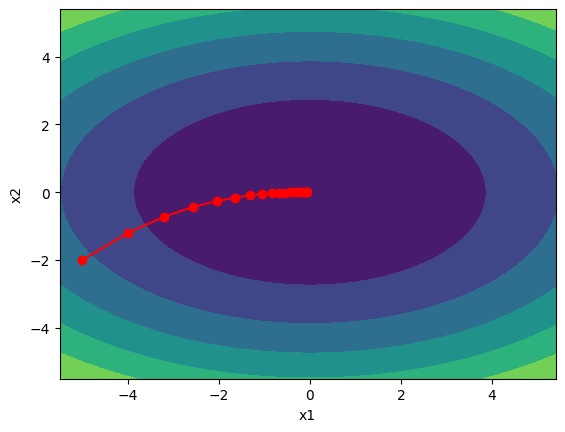

In [74]:
opt = Optimizers("constant", 0.1)
search_path(func, search(opt.gradient_descent, func_grad))